# Proyek Analisis Data: [E-commerce public dataset]
- **Nama:** [Khoirun Niswa]
- **Email:** [khoirunniswa08@student.ub.ac.id]
- **ID Dicoding:** [khoirun_niswa]

## Menentukan Pertanyaan Bisnis

- Dimanakah wilayah atau negara yang memiliki jumlah pelanggan terbanyak?
- metode pembayaran apa yang paling banyak digunakan?
- Bagaimana tingkat keberhasilan pengiriman pesanan kepada pelanggan berdasarkan status?
- Kapan terakhir kali pelanggan melakukan pembelian?
- Seberapa sering pelanggan melakukan pembelian dalam 90 hari terakhir?
- Seberapa banyak total pembayaran yang dilakukan oleh pelanggan dalam 90 hari terakhir?


## Import Semua Packages/Library yang Digunakan

import library yang diperlukan

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Membaca file CSV ke dalam DataFrame

In [17]:
customers_df = pd.read_csv('/content/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

cek customers_df


In [22]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [23]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


cek_orders_df

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat missing value pada order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

In [27]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [28]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [29]:
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [30]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00
freq,1,1,96478,3,169,1783,2965,522


cek order_reviews_df

In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [34]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


cek order_payments_df

In [35]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Cleaning Data

orders_df

In [38]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date",]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


mengubah tipe data menjadi datetime

In [40]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [41]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    169
2017-11-07 07:30:38      7
2018-02-27 04:31:01      7
2018-02-06 05:31:52      7
2017-11-07 07:30:29      7
                      ... 
2018-08-22 11:50:14      1
2017-09-22 11:27:36      1
2018-03-07 16:40:32      1
2017-08-08 10:50:15      1
2018-03-09 11:20:28      1
Name: order_approved_at, Length: 90733, dtype: int64

In [42]:
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)

Data yang hilang dalam DataFrame orders_df diisi dengan nilai '2018-02-27 04:31:10' untuk kolom 'order_purchase_timestamp'.

In [43]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

order_reviews_df

In [44]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
datetime_columns = ["review_creation_date", "review_answer_timestamp",]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [46]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [47]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [48]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [49]:
order_reviews_df.fillna(value="Recomendo", inplace=True)

Data yang hilang dalam DataFrame order_reviews_df diisi dengan nilai 'Recomendo' untuk kolom 'review_comment_message'

In [50]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customers_df

Mengambil sampel acak lima baris dari DataFrame

In [51]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
85062,65ab7119dbac155fbf2012978dac9fea,c685b2910f2fd37698ce0b715ae4a968,18410,itapeva,SP
50158,b7914f4692aa83f8c4cce8ed7a957634,780af3a1af374a3ec871313e4bbf7acf,35420,mariana,MG
54182,6927801c5cf0264f207efe237120977c,b0c5293ef398d678e68671488c8b87bf,8255,sao paulo,SP
96191,ef4330e4999fdb2780359307807093bd,0af866a53e660ef8eccb5ba24c1bb696,7142,guarulhos,SP
88237,025ce7b097bd128c2d494aeac94d62ea,8485723ea4c23f245f2bad68833199ae,13157,cosmopolis,SP


In [52]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


state dengan jumlah pelanggan terbanyak adalah Sao Paulo (SP), dengan 41716 pelanggan.

In [53]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
#customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Terdapat total 4.119 kota di mana pelanggan berada. Ini menunjukkan variasi geografis yang luas dari pelanggan e-commerce.

In [54]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

state kode SP menjadi wilayah dengan pelanggan terbanyak

### Explore orders_reviews_df

Mengambil sampel acak lima baris dari DataFrame

In [55]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
58971,d826ec40de27669548f70a58d33828ea,074c1cfd061914778c545332b9c8cc5b,3,Recomendo,recomendo,2018-03-29,2018-04-03 16:35:07
9947,27b253190f9b1d25530dde5f035520e3,8d7394529f217471379930f10b4237a2,3,Falta produtos,"Olá, o pedido chegou incompleto estou aguardan...",2018-06-02,2018-06-03 01:14:51
53907,7787c190c0e73f81e803f46c72ce9c71,c0aa0e99afe6f6dac845326a854690fd,3,Recomendo,"então,mesmo o produto sendo entregue no prazo,...",2017-08-09,2017-08-11 22:15:08
60633,45dbaa6e4137e2627c29b9789b8b066c,4722880b47a0cc081c878a5a1ba8fc21,3,Recomendo,Recomendo,2017-10-10,2017-10-16 17:51:36
52455,675a66d46c8923a442096ddf5a1c63d7,b34456bfbeeab3b57566ff099173e885,5,Recomendo,Recomendo,2018-02-28,2018-03-02 14:59:20


In [57]:
order_reviews_df.describe(include="all", datetime_is_numeric=True)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Recomendo,NaN,NaN
freq,3,3,NaN,88079,58347,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Menampilkan deskripsi statistik untuk semua kolom

### Explore orders_payments_df

In [58]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
16827,c6f6cbb3c845593222d5c594bb69c5fd,1,credit_card,4,104.34
19196,e2e7fc3ae21156fa90a10b87e7d37eec,1,credit_card,2,64.10
6191,448e3433c1fdb3dc2678294be291a7ec,1,credit_card,3,95.74
42819,b8d7fee0274d75202bee63e9e71fec3f,1,credit_card,4,163.13
89660,a0e747c954a595b0e3458c87ab1a4958,1,credit_card,6,1129.85


Mengambil sampel acak lima baris dari DataFrame

In [59]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Metode pembayaran yang paling banyak digunakan adalah credit card dengan total frekuensi sebanyak 76795

### Explore customer_df dan orders_df

menggabungkan customers_df dan orders_reviews_df berdasarkan kolom customer_id

In [60]:
orders_customers_df = pd.merge(
    left= orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [61]:
orders_customers_df.groupby(by="order_status").agg({
    "customer_id": "count",
    "order_id": "sum",
})

,customer_id,order_id
order_status,,
approved,2,a2e4c44360b4a57bdff22f3a4630c173132f1e724165a0...
canceled,625,1b9ecfe83cdc259250e1a8aca174f0ad714fb133a6730a...
created,5,b5359909123fa03c50bdb0cfed07f098dba5062fbda3af...
delivered,96478,e481f51cbdc54678b7cc49136f2d6af753cdb2fc8bc7dc...
invoiced,314,136cce7faa42fdb2cefd53fdc79a60980760a852e4e9d8...
processing,301,15bed8e2fec7fdbadb186b57c46c92f2d3c8851a6651ee...
shipped,1107,ee64d42b8cf066f35eac1cf57de1aa856942b8da583c2f...
unavailable,609,8e24261a7e58791d10cb1bf9da94df5cc272bcd21c2874...


mayoritas pesanan telah mencapai status "delivered" yang muncul sebanyak 96478 kali, yang menunjukkan tingkat keberhasilan yang tinggi dalam pengiriman pesanan kepada pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimanakah wilayah atau negara yang memiliki jumlah pelanggan terbanyak?

In [65]:
bystate_df = customers_df.groupby(by="customer_state").size().reset_index(name='customer_count')
bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)
print(bystate_df)

   customer_state  customer_count
25             SP           41746
18             RJ           12852
10             MG           11635
22             RS            5466
17             PR            5045
23             SC            3637
4              BA            3380
6              DF            2140
7              ES            2033
8              GO            2020
15             PE            1652
5              CE            1336
13             PA             975
12             MT             907
9              MA             747
11             MS             715
14             PB             536
16             PI             495
19             RN             485
1              AL             413
24             SE             350
26             TO             280
20             RO             253
2              AM             148
0              AC              81
3              AP              68
21             RR              46


mengelompokkan data dalam DataFrame berdasarkan nilai dalam kolom 'customer_state'.

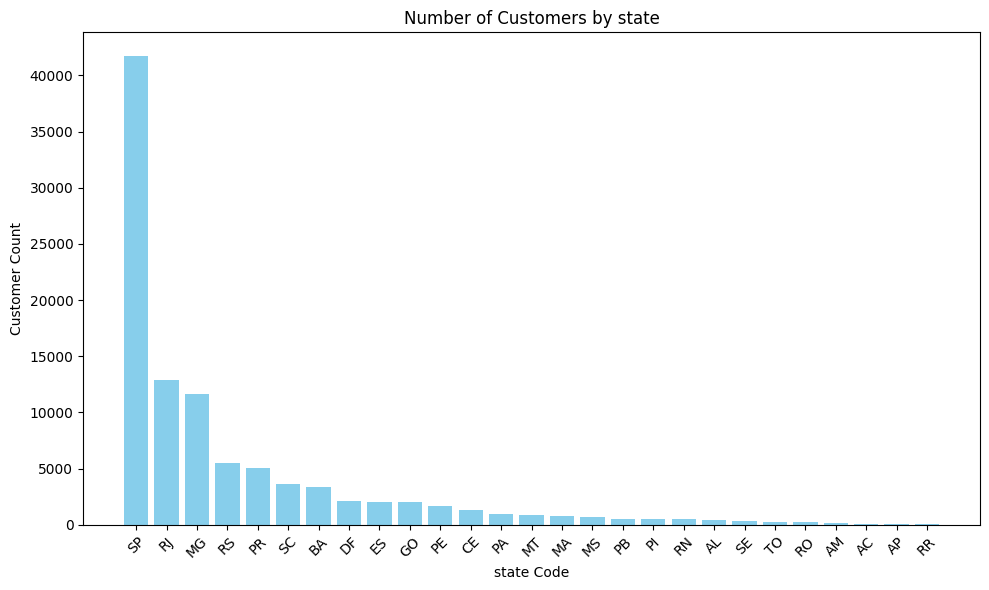

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(bystate_df['customer_state'], bystate_df['customer_count'], color='skyblue')
plt.xlabel('state Code')
plt.ylabel('Customer Count')
plt.title('Number of Customers by state')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

menampilkan jumlah pelanggan berdasarkan negara bagian, diurutkan dari yang terbanyak. Data yang lebih tinggi menunjukkan bahwa ada lebih banyak pelanggan dari negara bagian tersebut.

### Pertanyaan 2: Metode pembayaran apa yang paling banyak digunakan oleh pelanggan?

In [71]:
payment_counts_df = order_payments_df.groupby(by="payment_type").size().reset_index(name='transaction_count')
payment_counts_df = payment_counts_df.sort_values(by='transaction_count', ascending=False)
print(payment_counts_df)

  payment_type  transaction_count
1  credit_card              76795
0       boleto              19784
4      voucher               5775
2   debit_card               1529
3  not_defined                  3


mengelompokkan data dalam DataFrame berdasarkan nilai dalam kolom 'payment_type'.

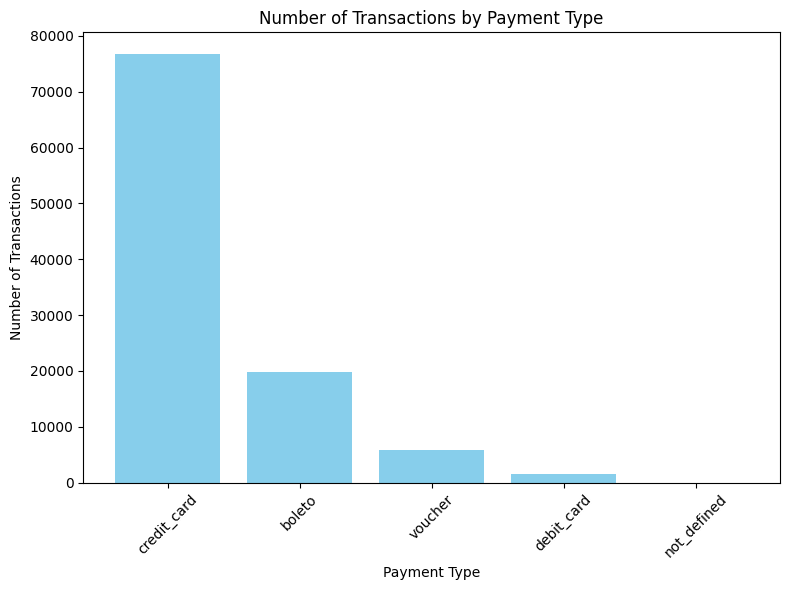

In [72]:
plt.figure(figsize=(8, 6))
plt.bar(payment_counts_df['payment_type'], payment_counts_df['transaction_count'], color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Payment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

menampilkan jumlah transaksi berdasarkan jenis pembayaran, diurutkan dari yang terbanyak. Data yang lebih tinggi menunjukkan bahwa jenis pembayaran tersebut lebih sering digunakan.

### Pertanyaan 3: Bagaimana tingkat keberhasilan pengiriman pesanan kepada pelanggan berdasarkan status?

In [75]:
bystatus_df = orders_customers_df.groupby(by="order_status").size().reset_index(name='customer_count')
print(bystatus_df)

  order_status  customer_count
0     approved               2
1     canceled             625
2      created               5
3    delivered           96478
4     invoiced             314
5   processing             301
6      shipped            1107
7  unavailable             609


mengelompokkan data dalam DataFrame berdasarkan nilai dalam kolom 'order_status'.

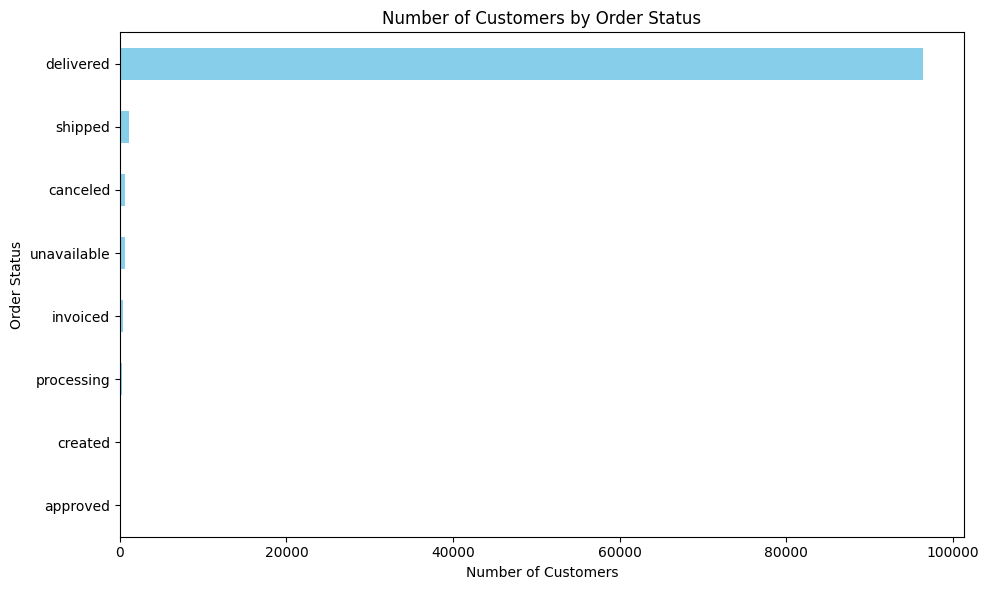

In [74]:
status_customer_count = orders_customers_df.groupby(by="order_status")["customer_id"].count()

# Plotting
plt.figure(figsize=(10, 6))
status_customer_count.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Customers')
plt.ylabel('Order Status')
plt.title('Number of Customers by Order Status')
plt.tight_layout()
plt.show()

menampilkan jumlah pelanggan berdasarkan status pesanan. Data yang lebih tinggi menunjukkan bahwa pesanan dengan status tersebut melibatkan lebih banyak pelanggan.

### RFM Analysis untuk menjawab pertanyaan no. 4 - 6
#### Pertanyaan 4: Kapan terakhir kali pelanggan melakukan pembelian?
#### Pertanyaan 5: Seberapa sering pelanggan melakukan pembelian dalam beberapa bulan terakhir?
#### Pertanyaan 6: Seberapa banyak total pembayaran yang dilakukan oleh pelanggan dalam beberapa bulan terakhir?

Best Customers Based on RFM Parameters

Recency:
Average Recency (days): 71.1


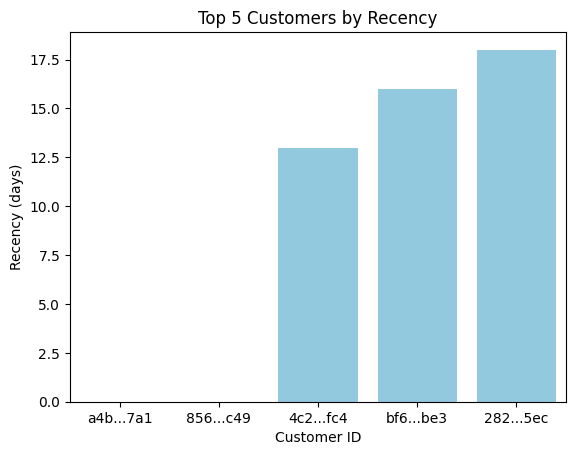


Frequency:
Average Frequency: 1.0


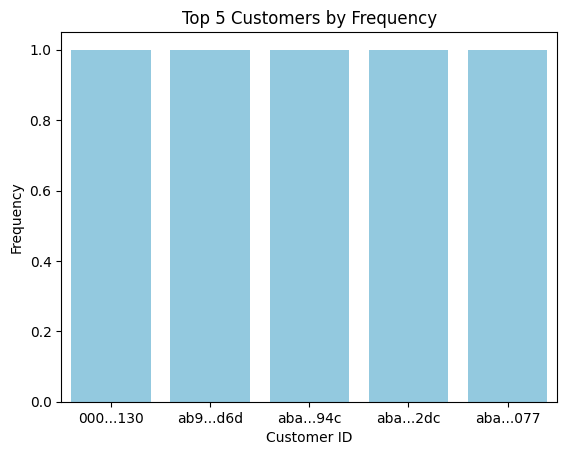


Monetary:
Average Monetary: $159.92


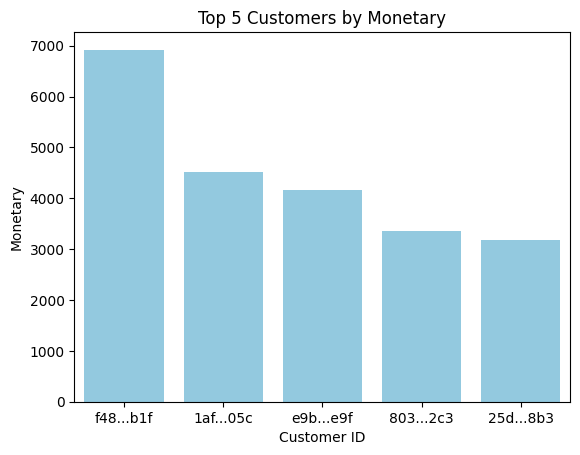

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from datetime import timedelta

fix_orders_df = pd.read_csv("fix_orders.csv")
fix_order_payments_df = pd.read_csv("fix_order_payments.csv")

def calculate_rfm(fix_orders_df, fix_order_payments_df):
    fix_orders_df['order_purchase_timestamp'] = pd.to_datetime(fix_orders_df['order_purchase_timestamp'])

    # Filter data for the last 90 days
    end_date = fix_orders_df['order_purchase_timestamp'].max()
    start_date = end_date - timedelta(days=90)
    filtered_orders_df = fix_orders_df[(fix_orders_df['order_purchase_timestamp'] >= start_date) & (fix_orders_df['order_purchase_timestamp'] <= end_date)].copy()  # Menggunakan .copy() untuk membuat salinan DataFrame

    # Recency
    max_purchase_date = filtered_orders_df['order_purchase_timestamp'].max()
    filtered_orders_df.loc[:, 'recency'] = (max_purchase_date - filtered_orders_df['order_purchase_timestamp']).dt.days  # Menggunakan .loc[] untuk mengindeks DataFrame dan memastikan perubahan dilakukan pada DataFrame asli

    # Frequency
    frequency_df = filtered_orders_df.groupby('customer_id').size().reset_index(name='frequency')

    # Monetary
    monetary_df = fix_order_payments_df.groupby('order_id')['payment_value'].sum().reset_index()
    monetary_df = pd.merge(filtered_orders_df[['customer_id', 'order_id']], monetary_df, on='order_id', how='left')
    monetary_df = monetary_df.groupby('customer_id')['payment_value'].sum().reset_index(name='monetary')

    # Merge RFM values
    rfm_df = pd.merge(frequency_df, monetary_df, on='customer_id', how='left')
    rfm_df = pd.merge(rfm_df, filtered_orders_df[['customer_id', 'recency']], on='customer_id', how='left')

  # Shorten customer IDs
    rfm_df['customer_id_shortened'] = rfm_df['customer_id'].str.slice(0, 3) + '...' + rfm_df['customer_id'].str.slice(-3)
    return rfm_df

def visualize_rfm_analysis(fix_orders_df, fix_order_payments_df):
    # Calculate RFM for the last 90 days
    rfm_df = calculate_rfm(fix_orders_df, fix_order_payments_df)

    # Display RFM metrics
    print("Best Customers Based on RFM Parameters")

    # Recency
    print("\nRecency:")
    print("Average Recency (days):", round(rfm_df['recency'].mean(), 1))
    fig_recency, ax_recency = plt.subplots()
    sns.barplot(y="recency", x="customer_id_shortened", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color='skyblue')
    ax_recency.set_ylabel("Recency (days)")
    ax_recency.set_xlabel("Customer ID")
    ax_recency.set_title("Top 5 Customers by Recency")
    plt.show()

    # Frequency
    print("\nFrequency:")
    print("Average Frequency:", round(rfm_df['frequency'].mean(), 2))
    fig_frequency, ax_frequency = plt.subplots()
    sns.barplot(y="frequency", x="customer_id_shortened", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color='skyblue')
    ax_frequency.set_ylabel("Frequency")
    ax_frequency.set_xlabel("Customer ID")
    ax_frequency.set_title("Top 5 Customers by Frequency")
    plt.show()

    # Monetary
    print("\nMonetary:")
    avg_monetary = round(rfm_df['monetary'].mean(), 2)
    print("Average Monetary:", format_currency(avg_monetary, 'USD', locale='en_US'))
    fig_monetary, ax_monetary = plt.subplots()
    sns.barplot(y="monetary", x="customer_id_shortened", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color='skyblue')
    ax_monetary.set_ylabel("Monetary")
    ax_monetary.set_xlabel("Customer ID")
    ax_monetary.set_title("Top 5 Customers by Monetary")
    plt.show()

visualize_rfm_analysis(fix_orders_df, fix_order_payments_df)


By Recency (days):
menampilkan lima pelanggan dengan nilai recency (jumlah hari sejak pembelian terakhir) terendah. Semakin rendah nilai recency, semakin baru pelanggan tersebut melakukan pembelian. y menunjukkan jumlah hari (recency), sedangkan x menampilkan ID pelanggan.Pelanggan yang memiliki bar recency paling rendah menunjukkan bahwa mereka adalah pelanggan yang paling baru-baru ini melakukan pembelian. rata-rata pelanggan terakhir kali melakukan pembelian sekitar 72 hari yang lalu.


By Frequency: menampilkan lima pelanggan dengan frekuensi pembelian tertinggi. y menunjukkan frekuensi pembelian, sedangkan x menampilkan ID pelanggan. Pelanggan yang memiliki bar frequency tertinggi menunjukkan bahwa mereka adalah pelanggan yang paling sering melakukan pembelian. pada barchart ini rata-rata pelanggan melakukan satu kali pembelian selama beberapa bulan terakhir.


By Monetary: menampilkan lima pelanggan dengan nilai monetary (total nilai pembelian) tertinggi. y menunjukkan nilai monetary, sedangkan x menampilkan ID pelanggan. Pelanggan yang memiliki bar monetary tertinggi menunjukkan bahwa mereka adalah pelanggan yang menghasilkan pendapatan tertinggi bagi bisnis. rata-rata total nilai pembelian oleh pelanggan menunjukkan bahwa pelanggan menghabiskan sekitar 160 dollar dalam pembelian mereka.

## Conclusion

- pelangan dengan wilayah state code SP menempati peringkat pertama sebagai pelanggan terbanyak di wilayah tersebut dengan jumlah  41746 pelanggan.

- metode pembayaran yang paling banyak digunakan adalah metode pembayaran melalui credit card yakni sebanyak 76.795.

- sebanyak 96.478 pelangan dari total 99.441 telah ber status delivered yang menunjukkan tingkat keberhasilan yang tinggi dalam pengiriman pesanan kepada pelanggan.

- Barchart diatas menunjukkan bahwa rata-rata pelanggan terakhir kali melakukan pembelian sekitar 72 hari yang lalu.

- Barchart diatas menunjukkan bahwa rata-rata frekuensi pembelian oleh pelanggan yaitu pelanggan hanya melakukan satu pembelian selama periode waktu yang diamati.

- Barchart diatas menunjukkan bahwa rata-rata total nilai pembelian oleh pelanggan menunjukkan bahwa pelanggan menghabiskan sekitar 160 dollar dalam pembelian mereka.

In [ ]:
orders_customers_df.to_csv("orders_customers.csv", index=False)
customers_df.to_csv("fix_customers.csv", index=False)
orders_df.to_csv("fix_orders.csv", index=False)
order_reviews_df.to_csv("fix_order_reviews.csv", index=False)
order_payments_df.to_csv("fix_order_payments.csv", index=False)